# **Building a prediction model of house price**

Data Acquisition

In [9]:
# upload data_description.txt and train.csv to the Colab environment

from google.colab import files
uploaded = files.upload() 


Saving data_description.txt to data_description.txt
Saving train.csv to train (1).csv


In [2]:
# load necssary libraries and set word dictionary

import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
os.listdir()

['.config', 'sample_data']

In [5]:
# Display the variable list and some data details
df = pd.read_csv('train.csv')
print(df.columns.values)
print(df.shape)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

Data exploration and pre-processing

In [10]:
# learn mre about detailed varibale explanation in file 'data_description.txt'

des = open("data_description.txt", "r")
data_explain = des.readlines()
des.close()
regex=re.compile('^[a-zA-Z0-9]')
exp_list = [re.match(regex, i) for i in data_explain]
exp_indx = np.asarray(np.where([type(i) == type(exp_list[0]) for i in exp_list]))[0]
exp_col = np.array(data_explain)[exp_indx.astype(int)]

In [11]:
exp_df = pd.DataFrame(exp_col)
exp_df.columns = ['v']
exp_df = pd.DataFrame(exp_df.v.str.split(':',1).tolist(),  columns = ['var','mean'])
for i, r in exp_df.iterrows():
    print(r['var'], ":", r['mean'])

MSSubClass :  Identifies the type of dwelling involved in the sale.	

MSZoning :  Identifies the general zoning classification of the sale.

LotFrontage :  Linear feet of street connected to property

LotArea :  Lot size in square feet

Street :  Type of road access to property

Alley :  Type of alley access to property

LotShape :  General shape of property

LandContour :  Flatness of the property

Utilities :  Type of utilities available

LotConfig :  Lot configuration

LandSlope :  Slope of property

Neighborhood :  Physical locations within Ames city limits

Condition1 :  Proximity to various conditions

Condition2 :  Proximity to various conditions (if more than one is present)

BldgType :  Type of dwelling

HouseStyle :  Style of dwelling

OverallQual :  Rates the overall material and finish of the house

OverallCond :  Rates the overall condition of the house

YearBuilt :  Original construction date

YearRemodAdd :  Remodel date (same as construction date if no remodeling or add

In [12]:
# Check for missing data
missing=pd.concat([df.isnull().any(),df.count()],axis=1)
column=['Missing or Not','Number']
missing=pd.DataFrame(list(missing.values),index=list(missing.index),columns=column)
max=missing['Number'].max()
missing['Missing_data']=max-missing['Number']
missing['Missing_rate']=missing['Missing_data']/max
miss=missing[missing['Number'] < max]
print(miss)

              Missing or Not  Number  Missing_data  Missing_rate
LotFrontage             True    1201           259      0.177397
Alley                   True      91          1369      0.937671
MasVnrType              True    1452             8      0.005479
MasVnrArea              True    1452             8      0.005479
BsmtQual                True    1423            37      0.025342
BsmtCond                True    1423            37      0.025342
BsmtExposure            True    1422            38      0.026027
BsmtFinType1            True    1423            37      0.025342
BsmtFinType2            True    1422            38      0.026027
Electrical              True    1459             1      0.000685
FireplaceQu             True     770           690      0.472603
GarageType              True    1379            81      0.055479
GarageYrBlt             True    1379            81      0.055479
GarageFinish            True    1379            81      0.055479
GarageQual              T

In [13]:
# convert 3 variables ('YearBuilt' 'YearRemodAdd' 'GarageYrBlt') which are all related to year into the time difference between the variables and the year of sold.
# subtract ('YearBuilt' 'YearRemodAdd' 'GarageYrBlt') from 'YrSold
# In this way, we have a clearer picture of how long the house has been built, or remodeled, or how long the garage has been built at the time of the sale

df_sample1 = df.copy()
df_sample1['YearBeenBuilt'] = df_sample1['YrSold'] - df_sample1['YearBuilt']
df_sample1['YearBeanRemod'] = df_sample1['YrSold'] - df_sample1['YearRemodAdd']
df_sample1['GarageBeenBuilt'] = df_sample1['YrSold'] - df_sample1['GarageYrBlt']
print(df_sample1.columns.values)
df_sample1.shape

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

(1460, 84)

In [14]:
# delete predictors that have too much missing data ('Alley','PoolQC','Fence','MiscFeature''FireplaceQu')
# delete useless predictors('Id')
# delete predictors ('YearBuilt','YearRemodAdd','GarageYrBlt') that have already been converted to other forms of predictors. The converted variables ('YearBeenBuilt' 'YearBeanRemod' 'GarageBeenBuilt') have been preserved.

rvar_list = ['Id','Alley','PoolQC','Fence','MiscFeature','FireplaceQu','YearBuilt','YearRemodAdd','GarageYrBlt']
df_sample2 = df_sample1.drop(columns=rvar_list)
print(df_sample2.columns.values)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual'
 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2'
 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces'
 'GarageType' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SaleType' 'SaleCondition' 'SalePrice' 'YearBeenBuilt' 'YearBeanRemod'
 'GarageBeenBuilt']


In [121]:
# Separate all the variables into two lists for future column indexing. One for numerical, the other for categorical 

cvar_list = ['MSSubClass', 'MSZoning', 'Street', 'LotShape','LandContour', 'Utilities' ,'LotConfig', 'LandSlope', 'Neighborhood',
 'Condition1' ,'Condition2', 'BldgType', 'HouseStyle' ,'OverallQual','OverallCond', 'RoofStyle' ,'RoofMatl', 'Exterior1st' ,'Exterior2nd',
 'MasVnrType',  'ExterQual' ,'ExterCond' ,'Foundation' ,'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual' ,'Functional','GarageType', 'GarageFinish',
 'GarageQual', 'GarageCond', 'PavedDrive' , 'MoSold', 'SaleType', 'SaleCondition']

nvar_list = [ 'LotFrontage', 'LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 
  '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',  'FullBath', 'HalfBath', 'BedroomAbvGr',
 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
 'EnclosedPorch','ScreenPorch', 'PoolArea', 'YearBeenBuilt','YearBeanRemod', 'GarageBeenBuilt','SalePrice']

In [122]:
# Set the datatype for the variables

df_sample3 = df_sample2.copy()
df_sample3[cvar_list] = df_sample2[cvar_list].astype('category')
df_sample3[nvar_list] = df_sample2[nvar_list].astype('float64')

In [123]:
# The missing garage data and basement data were mostly concentrated in a few lines, so we delete these few lines

df_sample4 = df_sample3.copy()
BaseNA = 'BsmtQual'
GaraNA = 'GarageType'
df_sample4 = df_sample4.dropna(subset=[BaseNA])
df_sample4 = df_sample4.dropna(subset=[GaraNA])
print(df_sample4.head(10))
df_sample4.shape

  MSSubClass MSZoning  ...  YearBeanRemod  GarageBeenBuilt
0         60       RL  ...            5.0              5.0
1         20       RL  ...           31.0             31.0
2         60       RL  ...            6.0              7.0
3         70       RL  ...           36.0              8.0
4         60       RL  ...            8.0              8.0
5         50       RL  ...           14.0             16.0
6         20       RL  ...            2.0              3.0
7         60       RL  ...           36.0             36.0
8         50       RM  ...           58.0             77.0
9        190       RL  ...           58.0             69.0

[10 rows x 75 columns]


(1349, 75)

In [124]:
# Impute numerical missing values using sample median
# Impute the categorical missing values using sample mode
# Check again for missing data

df_sample5 = df_sample4.copy()
df_sample5[nvar_list] = df_sample4[nvar_list].fillna(value=df_sample3[nvar_list].median())
df_sample5[cvar_list] = df_sample4[cvar_list].fillna(value=df_sample3[cvar_list].mode().loc[0,:])
print(df_sample5.isnull().sum().sort_values(ascending=False))
df_sample5.shape


GarageBeenBuilt    0
RoofMatl           0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
                  ..
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
GarageType         0
MSSubClass         0
Length: 75, dtype: int64


(1349, 75)

                 LotFrontage   LotArea  ...  YearBeanRemod  GarageBeenBuilt
LotFrontage         1.000000  0.297441  ...      -0.077996        -0.063558
LotArea             0.297441  1.000000  ...      -0.001196         0.025599
MasVnrArea          0.175297  0.095940  ...      -0.165194        -0.245177
BsmtFinSF1          0.218056  0.210654  ...      -0.098282        -0.143437
BsmtFinSF2          0.039938  0.109643  ...       0.087035         0.093828
BsmtUnfSF           0.108619 -0.012646  ...      -0.174728        -0.182611
TotalBsmtSF         0.376943  0.266749  ...      -0.262342        -0.318634
1stFlrSF            0.409421  0.291771  ...      -0.239420        -0.235726
2ndFlrSF            0.065827  0.045928  ...      -0.122926        -0.062739
LowQualFinSF        0.010643  0.009601  ...       0.063520         0.036697
GrLivArea           0.362367  0.257563  ...      -0.277982        -0.226334
BsmtFullBath        0.101185  0.160753  ...      -0.095179        -0.112735
BsmtHalfBath

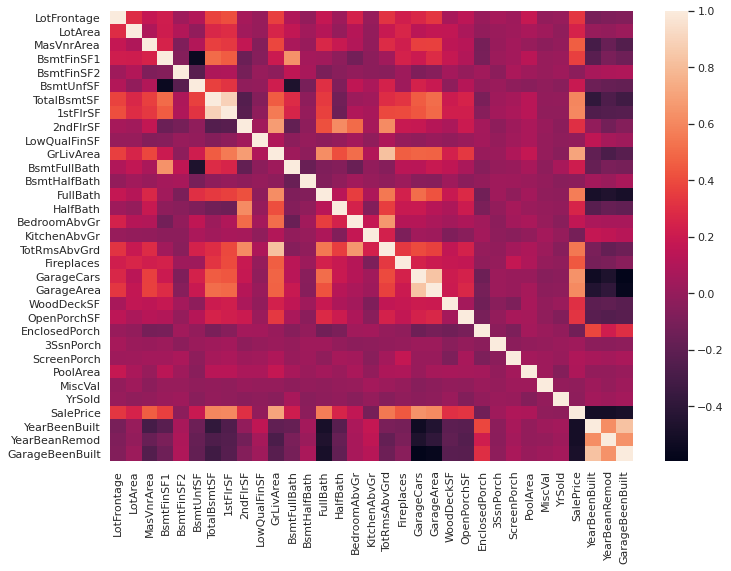

In [125]:
# Draw a heat map

df4heatmaps = df_sample5
corr = df4heatmaps.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


In [126]:
# Download correlation file

from google.colab import files
corr.to_csv('corr.csv') 
files.download('corr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
# take out predictors whose correlation is less than 0.1

NoCvar_list = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'YrSold']
df_sample6 = df_sample5.drop(columns=NoCvar_list)
print(df_sample6.columns.values)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual'
 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2'
 'BsmtUnfSF' 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical'
 '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'BsmtFullBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional'
 'Fireplaces' 'GarageType' 'GarageFinish' 'GarageCars' 'GarageArea'
 'GarageQual' 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' 'ScreenPorch' 'PoolArea' 'MoSold' 'SaleType'
 'SaleCondition' 'SalePrice' 'YearBeenBuilt' 'YearBeanRemod'
 'GarageBeenBuilt']


                 LotFrontage   LotArea  ...  YearBeanRemod  GarageBeenBuilt
LotFrontage         1.000000  0.297441  ...      -0.077996        -0.063558
LotArea             0.297441  1.000000  ...      -0.001196         0.025599
MasVnrArea          0.175297  0.095940  ...      -0.165194        -0.245177
BsmtFinSF1          0.218056  0.210654  ...      -0.098282        -0.143437
BsmtUnfSF           0.108619 -0.012646  ...      -0.174728        -0.182611
TotalBsmtSF         0.376943  0.266749  ...      -0.262342        -0.318634
1stFlrSF            0.409421  0.291771  ...      -0.239420        -0.235726
2ndFlrSF            0.065827  0.045928  ...      -0.122926        -0.062739
GrLivArea           0.362367  0.257563  ...      -0.277982        -0.226334
BsmtFullBath        0.101185  0.160753  ...      -0.095179        -0.112735
FullBath            0.174074  0.119467  ...      -0.460912        -0.486357
HalfBath            0.035888  0.004086  ...      -0.173354        -0.190993
BedroomAbvGr

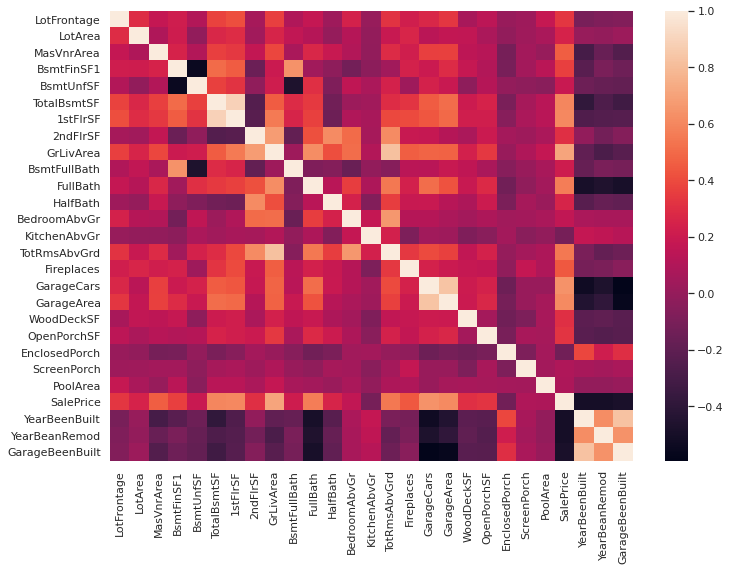

In [128]:
# draw a heatmap after taking out predictors with low correlations

df4heatmaps = df_sample6
corr = df4heatmaps.corr()
print(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)


In [129]:
# Standardize the numerical variables
 
df_sample7 = df_sample6.copy()
df_sample7[nvar_list] = (df_sample6[nvar_list] - df_sample6[nvar_list].mean())/df_sample6[nvar_list].std()

print(df_sample7.head(10))
df_sample7.shape


  MSSubClass MSZoning  ...  YearBeanRemod  GarageBeenBuilt
0         60       RL  ...      -0.838392        -0.968008
1         20       RL  ...       0.443631         0.079826
2         60       RL  ...      -0.789083        -0.887405
3         70       RL  ...       0.690174        -0.847104
4         60       RL  ...      -0.690466        -0.847104
5         50       RL  ...      -0.394615        -0.524694
6         20       RL  ...      -0.986318        -1.048611
7         60       RL  ...       0.690174         0.281332
8         50       RM  ...       1.774962         1.933686
9        190       RL  ...       1.774962         1.611275

[10 rows x 69 columns]


(1349, 69)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


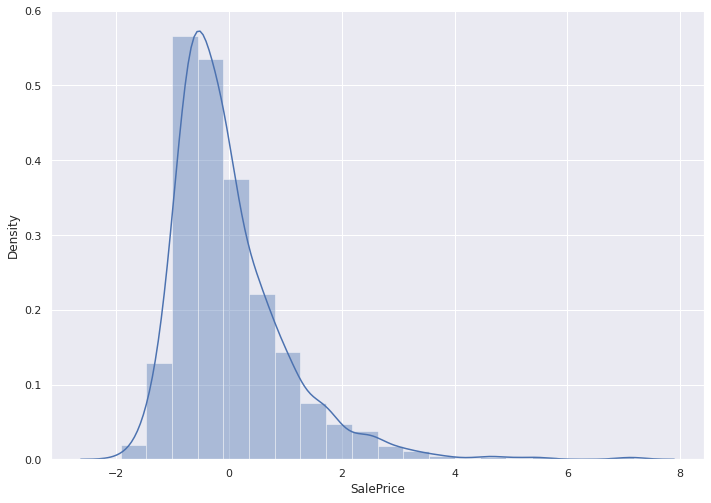

In [130]:
# explore the distributiion of the sales price
# it is quasi normal distributed, which is good news for us if we use correlation or lasso selection as method to condcutt dimension reduction.

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(df_sample7.SalePrice[0:1349], bins=20)

plt.show()

In [131]:
# Get Dummies

df_sample8 = df_sample7.copy()
df_sample8 = pd.get_dummies(df_sample7, prefix_sep='_')
print(df_sample8.columns.values)
print(df_sample8.head(10))
df_sample8.shape

['LotFrontage' 'LotArea' 'MasVnrArea' 'BsmtFinSF1' 'BsmtUnfSF'
 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'BsmtFullBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 'ScreenPorch' 'PoolArea' 'SalePrice' 'YearBeenBuilt' 'YearBeanRemod'
 'GarageBeenBuilt' 'MSSubClass_20' 'MSSubClass_30' 'MSSubClass_40'
 'MSSubClass_45' 'MSSubClass_50' 'MSSubClass_60' 'MSSubClass_70'
 'MSSubClass_75' 'MSSubClass_80' 'MSSubClass_85' 'MSSubClass_90'
 'MSSubClass_120' 'MSSubClass_160' 'MSSubClass_180' 'MSSubClass_190'
 'MSZoning_C (all)' 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RL'
 'MSZoning_RM' 'Street_Grvl' 'Street_Pave' 'LotShape_IR1' 'LotShape_IR2'
 'LotShape_IR3' 'LotShape_Reg' 'LandContour_Bnk' 'LandContour_HLS'
 'LandContour_Low' 'LandContour_Lvl' 'Utilities_AllPub' 'Utilities_NoSeWa'
 'LotConfig_Corner' 'LotConfig_CulDSac' 'LotConfig_FR2' 'LotConfig_FR3'
 'LotConfig_Inside' 'LandSlope_Gtl' '

(1349, 307)

In [132]:
print(df_sample7[cvar_list].mode().loc[0,:])

MSSubClass            20
MSZoning              RL
Street              Pave
LotShape             Reg
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood       NAmes
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        1Story
OverallQual            6
OverallCond            5
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType          None
ExterQual             TA
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         GLQ
BsmtFinType2         Unf
Heating             GasA
HeatingQC             Ex
CentralAir             Y
Electrical         SBrkr
KitchenQual           TA
Functional           Typ
GarageType        Attchd
GarageFinish         Unf
GarageQual            TA
GarageCond            TA
PavedDrive             Y
MoSold                 6


In [133]:
# Remove the most common redundant dummies

rdummies = ['MSSubClass_20','MSZoning_RL', 'Street_Pave', 'LotShape_Reg','LandContour_Lvl', 'Utilities_AllPub','LotConfig_Inside', 'LandSlope_Gtl', 'Neighborhood_NAmes',
 'Condition1_Norm' ,'Condition2_Norm', 'BldgType_1Fam', 'HouseStyle_1Story' ,'OverallQual_6','OverallCond_5', 'RoofStyle_Gable' ,'RoofMatl_CompShg', 'Exterior1st_VinylSd' ,'Exterior2nd_VinylSd',
 'MasVnrType_None',  'ExterQual_TA' ,'ExterCond_TA' ,'Foundation_PConc' ,'BsmtQual_Gd', 'BsmtCond_TA', 'BsmtExposure_No', 'BsmtFinType1_GLQ','BsmtFinType2_Unf',
 'Heating_GasA', 'HeatingQC_Ex', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_TA','Functional_Typ','GarageType_Attchd', 'GarageFinish_Unf','GarageQual_TA','GarageCond_TA','PavedDrive_Y','MoSold_6','SaleType_WD',
 'SaleCondition_Normal']
df_sample9 = df_sample8.copy()
df_sample9 = df_sample9.drop(columns=rdummies)
print(df_sample9.columns.values)
print(df_sample9)

['LotFrontage' 'LotArea' 'MasVnrArea' 'BsmtFinSF1' 'BsmtUnfSF'
 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'BsmtFullBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 'ScreenPorch' 'PoolArea' 'SalePrice' 'YearBeenBuilt' 'YearBeanRemod'
 'GarageBeenBuilt' 'MSSubClass_30' 'MSSubClass_40' 'MSSubClass_45'
 'MSSubClass_50' 'MSSubClass_60' 'MSSubClass_70' 'MSSubClass_75'
 'MSSubClass_80' 'MSSubClass_85' 'MSSubClass_90' 'MSSubClass_120'
 'MSSubClass_160' 'MSSubClass_180' 'MSSubClass_190' 'MSZoning_C (all)'
 'MSZoning_FV' 'MSZoning_RH' 'MSZoning_RM' 'Street_Grvl' 'LotShape_IR1'
 'LotShape_IR2' 'LotShape_IR3' 'LandContour_Bnk' 'LandContour_HLS'
 'LandContour_Low' 'Utilities_NoSeWa' 'LotConfig_Corner'
 'LotConfig_CulDSac' 'LotConfig_FR2' 'LotConfig_FR3' 'LandSlope_Mod'
 'LandSlope_Sev' 'Neighborhood_Blmngtn' 'Neighborhood_Blueste'
 'Neighborhood_BrDale' 'Neighborhood_BrkSide' 'Neighbor

Data Partiton


In [134]:
# Data Partiton

from sklearn.model_selection import train_test_split

df4partition = df_sample9
testpart_size = 0.2

df_nontestData, df_testData = train_test_split(df4partition, test_size=testpart_size, random_state=1)
print(df_nontestData)

      LotFrontage   LotArea  ...  SaleCondition_Family  SaleCondition_Partial
1146    -0.065997  0.046813  ...                     0                      0
6        0.205023 -0.061383  ...                     0                      0
758     -2.098651 -0.817978  ...                     0                      0
699     -0.517698 -0.623885  ...                     0                      0
1269     0.340534  0.060774  ...                     0                      0
...           ...       ...  ...                   ...                    ...
776      0.701894  0.047783  ...                     0                      1
980     -0.065997  0.136201  ...                     0                      0
1189    -0.472528 -0.311901  ...                     0                      0
258      0.430874  0.166546  ...                     0                      0
1152     0.882575  0.329421  ...                     0                      0

[1079 rows x 265 columns]


Lasso analysis

In [135]:
# Lasso analysis


from sklearn.linear_model import Lasso, LassoCV

DV = 'SalePrice'
y = df_nontestData[DV]
X = df_nontestData.drop(columns=[DV])

alpha = 0.01

# The Lasso results are put into a Lasso model object clf
clf = Lasso(alpha=alpha, random_state=1).fit(X,y)

# to display the estimated coefficients of a model candidate obtained by the Lasso analysis
def summary_coef(model_object):
  n_predictors = X.shape[1]
  model_coef = pd.DataFrame(model_object.coef_.reshape(1, n_predictors), columns=X.columns.values)
  model_coef['Intercept'] = model_object.intercept_
  return model_coef.transpose()

# Run Lasso with k-fold cross validation with k=5
kfolds = 5

# Set n_jobs to be -1 to run LassoCV on all CPU cores.
clf_optimal = LassoCV(cv=kfolds, random_state=1, n_jobs=-1).fit(X,y)

# Display the optimal alpha that yields the final selected model (the best model candidate)
print(clf_optimal.alpha_)

# Display the estimated coefficients of the final selected model
print(summary_coef(clf_optimal))

# Calcuate the ASE over the test partition based on the final selected model

# y_test_actual is the actual values of the DV in the test partition
y_test_actual = df_testData[DV]

# X_test is the predictor values in the test partition
X_test = df_testData.drop(columns=[DV])

# Use predict method of the clf_optimal object to apply the model associated with clf_optimal to the test partition
# y_test_predicted is the predicted values of the DV in the test partition 
y_test_predicted = clf_optimal.predict(X_test)

# Get the number of obs in the test partition
n_obs_test = df_testData.shape[0]

# Derive ASE over the test partition based on the definition of ASE
ASE_test = sum((y_test_actual - y_test_predicted)**2)/n_obs_test


# Derive ASE over the nontest partition based on the definition of ASE
y_nontest_actual = y
y_nontest_predicted = clf_optimal.predict(X)
n_obs_nontest = df_nontestData.shape[0]

ASE_nontest = sum((y_nontest_actual - y_nontest_predicted)**2)/n_obs_nontest

# Compare the ASE over the test partition and the nontest partition.
# If the gap is big, the final selected model might overfit the historical data 
print(ASE_test)
print(ASE_nontest)

0.0012411595924416998
                              0
LotFrontage            0.005858
LotArea                0.043968
MasVnrArea             0.013837
BsmtFinSF1             0.055900
BsmtUnfSF             -0.015902
...                         ...
SaleCondition_AdjLand  0.000000
SaleCondition_Alloca  -0.000000
SaleCondition_Family  -0.048762
SaleCondition_Partial  0.145188
Intercept             -0.204699

[265 rows x 1 columns]
0.12250064668191403
0.07693697940526609


Score the new data

In [136]:
# Upload UsedCar_NewData.csv from the local drive to Colab

from google.colab import files
uploaded = files.upload()

Saving test.csv to test (1).csv


In [193]:
df_newdata = pd.read_csv('test.csv')
print(df.shape)
print(df_newdata.isnull().sum())

(1460, 81)
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [194]:
# Check for missing data
missing=pd.concat([df_newdata.isnull().any(),df.count()],axis=1)
column=['Missing or Not','Number']
missing=pd.DataFrame(list(missing.values),index=list(missing.index),columns=column)
max=missing['Number'].max()
missing['Missing_data']=max-missing['Number']
missing['Missing_rate']=missing['Missing_data']/max
miss=missing[missing['Number'] < max]
print(miss)

             Missing or Not  Number  Missing_data  Missing_rate
LotFrontage            True    1201           259      0.177397
Alley                  True      91          1369      0.937671
MasVnrType             True    1452             8      0.005479
MasVnrArea             True    1452             8      0.005479
BsmtQual               True    1423            37      0.025342
BsmtCond               True    1423            37      0.025342
BsmtExposure           True    1422            38      0.026027
BsmtFinType1           True    1423            37      0.025342
BsmtFinType2           True    1422            38      0.026027
Electrical            False    1459             1      0.000685
FireplaceQu            True     770           690      0.472603
GarageType             True    1379            81      0.055479
GarageYrBlt            True    1379            81      0.055479
GarageFinish           True    1379            81      0.055479
GarageQual             True    1379     

In [195]:
# convert 3 variables ('YearBuilt' 'YearRemodAdd' 'GarageYrBlt') which are all related to year into the time difference between the variables and the year of sold.
# subtract ('YearBuilt' 'YearRemodAdd' 'GarageYrBlt') from 'YrSold
# In this way, we have a clearer picture of how long the house has been built, or remodeled, or how long the garage has been built at the time of the sale

df_newdata_sample1 = df_newdata.copy()
df_newdata_sample1['YearBeenBuilt'] = df_newdata_sample1['YrSold'] - df_newdata_sample1['YearBuilt']
df_newdata_sample1['YearBeanRemod'] = df_newdata_sample1['YrSold'] - df_newdata_sample1['YearRemodAdd']
df_newdata_sample1['GarageBeenBuilt'] = df_newdata_sample1['YrSold'] - df_newdata_sample1['GarageYrBlt']
print(df_newdata_sample1.columns.values)
df_newdata_sample1.shape

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

(1459, 83)

In [196]:
rvar_list = ['Id','Alley','PoolQC','Fence','MiscFeature','FireplaceQu','YearBuilt','YearRemodAdd','GarageYrBlt']
df_newdata_sample2 = df_newdata_sample1.drop(columns=rvar_list)
NoCvar_list = ['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'MiscVal', 'YrSold']
df_newdata_sample2 = df_newdata_sample2.drop(columns=NoCvar_list)
print(df_newdata_sample2.columns.values)
df_newdata_sample2.shape

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual'
 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2'
 'BsmtUnfSF' 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical'
 '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'BsmtFullBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional'
 'Fireplaces' 'GarageType' 'GarageFinish' 'GarageCars' 'GarageArea'
 'GarageQual' 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' 'ScreenPorch' 'PoolArea' 'MoSold' 'SaleType'
 'SaleCondition' 'YearBeenBuilt' 'YearBeanRemod' 'GarageBeenBuilt']


(1459, 68)

In [197]:
nvar_list2 = [ 'LotFrontage', 'LotArea', 'MasVnrArea','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 
  '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',  'FullBath', 'HalfBath', 'BedroomAbvGr',
 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF',
 'EnclosedPorch','ScreenPorch', 'PoolArea', 'YearBeenBuilt','YearBeanRemod', 'GarageBeenBuilt']

df_newdata_sample2[nvar_list2] = df_newdata_sample2[nvar_list2].fillna(value=df_sample4[nvar_list2].median())
df_newdata_sample2[cvar_list] = df_newdata_sample2[cvar_list].fillna(value=df_sample4[cvar_list].mode().loc[0,:])
print(df_newdata_sample2.isnull().sum().sort_values(ascending=False))

GarageBeenBuilt    0
ExterCond          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
                  ..
2ndFlrSF           0
1stFlrSF           0
Electrical         0
CentralAir         0
MSSubClass         0
Length: 68, dtype: int64


In [198]:
# Generate the numerical predictor list
npredictor_list = nvar_list.copy()
npredictor_list.remove(DV)
print(npredictor_list)


# Set the datatypes of the variables in the new data
df_newdata_sample3 = df_newdata_sample2.copy()
df_newdata_sample3[cvar_list] = df_newdata_sample2[cvar_list].astype('category')
df_newdata_sample3[npredictor_list] = df_newdata_sample2[npredictor_list].astype('float64')


df_newdata_sample4 = df_newdata_sample3.copy()
# Derive the sample mean and the sample standard deviation of the numerical variables in the historical data 
historical_sample_mean = df_sample4[nvar_list].mean()
historical_sample_std = df_sample4[nvar_list].std()



['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'YearBeenBuilt', 'YearBeanRemod', 'GarageBeenBuilt']


In [205]:
# Use the historical sample mean and historical sample standard deviation to standardize the new data
df_newdata_sample5 = df_newdata_sample4.copy()
df_newdata_sample5[npredictor_list] = (df_newdata_sample4[npredictor_list] - historical_sample_mean[npredictor_list])/historical_sample_std[npredictor_list]

# Code the categorical variables in the new data 
df_newdata_sample6 = pd.get_dummies(df_newdata_sample5, prefix_sep='_')

df_newdata_sample6.shape

(1459, 291)

In [200]:

# Drop the redundant dummies in the same way we did for the historical data
rdummies_newdata = ['MSSubClass_20','MSZoning_RL', 'Street_Pave', 'LotShape_Reg','LandContour_Lvl', 'Utilities_AllPub','LotConfig_Inside', 'LandSlope_Gtl', 'Neighborhood_NAmes',
 'Condition1_Norm' ,'Condition2_Norm', 'BldgType_1Fam', 'HouseStyle_1Story' ,'OverallQual_6','OverallCond_5', 'RoofStyle_Gable' ,'RoofMatl_CompShg', 'Exterior1st_VinylSd' ,'Exterior2nd_VinylSd',
 'MasVnrType_None',  'ExterQual_TA' ,'ExterCond_TA' ,'Foundation_PConc' ,'BsmtQual_Gd', 'BsmtCond_TA', 'BsmtExposure_No', 'BsmtFinType1_GLQ','BsmtFinType2_Unf',
 'Heating_GasA', 'HeatingQC_Ex', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_TA','Functional_Typ','GarageType_Attchd', 'GarageFinish_Unf','GarageQual_TA','GarageCond_TA','PavedDrive_Y','MoSold_6','SaleType_WD',
 'SaleCondition_Normal']
df_newdata_sample7 = df_newdata_sample6.drop(columns=rdummies_newdata)

df_newdata_sample7.shape


(1459, 249)

In [201]:
# Delete dummies in the test data, but not in the train data
rdu2 = 'MSSubClass_150'
df_newdata_sample8 = df_newdata_sample7.drop(columns=rdu2)
df_newdata_sample8.shape

(1459, 248)

In [206]:
# supplement dummies in the train data, but not in the test data
df_newdata_sample9 = df_newdata_sample8.copy()

rdu3 = ['Utilities_NoSeWa','Condition2_RRAe','Condition2_RRAn','Condition2_RRNn','HouseStyle_2.5Fin',
        'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal','RoofMatl_Roll',
        'Exterior1st_ImStucc','Exterior2nd_Other','Heating_Floor','Heating_OthW',
        'Electrical_Mix','GarageQual_Ex','Exterior1st_Stone']

for i in rdu3:
  df_newdata_sample9[i]=0

df_newdata_sample9.shape

(1459, 264)

In [207]:
# Score the new data using the model carried by the model object clf_optimal 
predicted_standardizedPrice = clf_optimal.predict(df_newdata_sample9)

# Print the standardized predicted prices for the new data observations
print(predicted_standardizedPrice)

# Convert the standardized predicted prices back to the original predicted prices using the historical sample mean and historical sample standard deviation
predicted_Price = predicted_standardizedPrice * historical_sample_std[DV] + historical_sample_mean[DV]

# Print the predicted prices (in the original dollar amount) for the new data observations 
print(predicted_Price)

[ 0.53544355  0.83025055 -0.23344252 ... -0.15636541 -0.90148471
  0.33335148]
[229429.88750923 252725.77293193 168671.89452672 ... 174762.58990476
 115882.66570659 213460.41026857]


In [204]:
for line in predicted_Price:  
  print (line)

229429.88750922505
252725.7729319294
168671.89452672374
263955.2176392209
187893.62830248746
157372.899630071
157415.52107506548
147079.9161064372
157109.272326854
142093.43589055235
185963.41979164584
115817.16750965882
120520.78230115649
247708.57139856857
197851.47673403024
270402.9690296735
246636.4010260509
253344.09556117453
280249.21135034744
348201.2163473763
267869.09303853003
224260.524807403
151239.99386307198
147946.10897017352
157613.91231390063
165339.95170662424
256507.0131817268
219606.21501617704
195172.89084131966
218108.10868637197
197579.5578674736
96612.70594366838
295066.06870733795
253569.46068913492
250422.14780119946
201513.97560674432
182921.02319812754
162360.88128612132
168372.33976409928
171716.38476605088
171474.3409518899
161365.38158812694
238408.39810381262
224640.86527906172
219581.6573927825
317432.96864068625
239824.70205586575
221904.60092586014
266092.03749042586
202521.86546454576
187986.16666724675
304769.5812225634
160092.864361851
261066.135367